In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Load dataset
df = pd.read_csv("heart_disease_uci.csv" )

In [ ]:
# Analisis Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [50]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [51]:
df.tail()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0
919,920,62,Male,VA Long Beach,atypical angina,120.0,254.0,False,lv hypertrophy,93.0,True,0.0,NaN,NaN,NaN,1


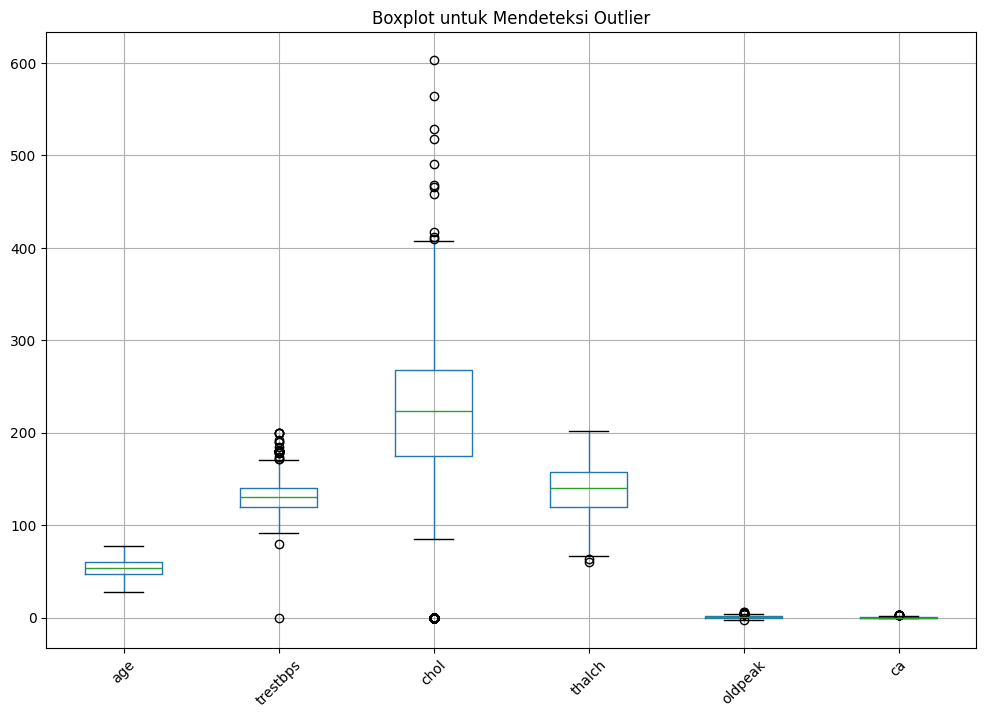

In [ ]:
# Visualisasi outlier menggunakan boxplot untuk kolom numerik
kolom = ["age", "trestbps", "chol", "thalch", "oldpeak", "ca"]
plt.figure(figsize=(12, 8))
df[kolom].boxplot(rot=45)
plt.title("Boxplot untuk Mendeteksi Outlier")
plt.show()

In [ ]:

# Menangani data kategorikal 
column = ["sex", "dataset", "cp", "fbs", "restecg", "exang", "slope", "thal"]
label_encoder = {}
for col in column:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # Konversi agar tidak error jika ada NaN
    label_encoder[col] = le

In [ ]:
# Menangani data yang hilang
input_mean = SimpleImputer(strategy="mean")
input_mode = SimpleImputer(strategy="most_frequent")


In [ ]:
# Imputasi kolom numerik dengan mean
df[["trestbps", "chol", "thalch", "oldpeak", "ca"]] = input_mean.fit_transform(df[["trestbps", "chol", "thalch", "oldpeak", "ca"]])

# Imputasi kolom kategorikal dengan modus (nilai yang paling sering muncul)
df[["fbs", "restecg", "exang", "slope", "thal"]] = input_mode.fit_transform(df[["fbs", "restecg", "exang", "slope", "thal"]])

In [ ]:
# Simpan dataset yang telah dibersihkan ke dalam file CSV
clean_file = "heart_disease_baru.csv"  # Ganti dengan path yang sesuai jika dijalankan secara lokal
df.to_csv(clean_file, index=False)

print(f"Dataset yang telah dibersihkan disimpan sebagai: {clean_file}")

Dataset yang telah dibersihkan disimpan sebagai: heart_disease_baru.csv
